## Natural Language Processing

Imagine you work for Google News and you want to group news articles by topic

Or you work for a legal firm and you need to sift through thousands of pages of legal documents to find relevant ones.

This is where NLP can help!

We will want to :
- Compile the Documents
- Featurize Them
- Compare their features

Here is a simple example:
- You have two documents:
    - "Blue House"
    - "Red House"
- Featurize based on work count:
    - "Blue House" -> (red,blue,house) -> (0, 1, 1)
    - "Red House" -> (red,blue,house) -> (1, 0, 1)
    
A document represented as a vector of word counts is called a "bag of words." You can use cosine similarly on the vectors to determine similarity

\\(sim({A,B}) = \cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{|\vec{a}||\vec{b}|} = \frac{\sum{a_i b_i}}{\sqrt{\sum{a_i^2}}\sqrt{\sum{b_i^2}}}\\)

We can improve on Bag of Words by adjusting word counts based on their frequency in corpis.

We can use TF-IDF (Term Frequency - Inverse Document Frequency)

### Definitions

Term Frequency - Importance of the term within that document
    - TF(d,t) = Number of occurences of term t in document d
Inverse Document Frequency - Importance of the term in the corpus
    - IDF(t) = log (D/t)
        D = total number of documents
        t = number of documents with the term


Mathemetically, TF-IDF is then expressed:

\\(W_{x,y} = tf_{x,y} = log(\frac{N}{df_x})\\)

Where:

\\(tf_{x,y}\\) = frequency of x in y

\\(df_{x}\\)  = number of documents containing x

\\(N)\\) = total number of documents

### NLP in R

In [1]:
#install.packages('tm',repos='http://cran.us.r-project.org')
#install.packages('twitteR',repos='http://cran.us.r-project.org')
#install.packages('wordcloud',repos='http://cran.us.r-project.org')
#install.packages('RColorBrewer',repos='http://cran.us.r-project.org')
#install.packages('e1017',repos='http://cran.us.r-project.org')
#install.packages('class',repos='http://cran.us.r-project.org')

In [16]:
library(twitteR)
library(tm)
library(wordcloud)
library(RColorBrewer)

ckey <- 
skey <-  
token <- 
sectoken <- 

setup_twitter_oauth(ckey, skey, token, sectoken)



[1] "Using direct authentication"


In [30]:
soccer.tweets <- searchTwitter("soccer", n=1000, lang="en")
soccer.text <- sapply(soccer.tweets, function(x) x$getText())
                      
soccer.text <- iconv(soccer.text, 'UTF-8', 'ASCII') # remove emoticons
soccer.corpus <- Corpus(VectorSource(soccer.text)) # create a corpus                      
                      
term.doc.matrix <- TermDocumentMatrix(soccer.corpus,
                                      control = list(removePunctuation = TRUE,
                                                     stopwords = c("soccer", "http", stopwords("english")),
                                                     removeNumbers = TRUE,tolower = TRUE))
                      
term.doc.matrix <-as.matrix(term.doc.matrix)            
                      

In [31]:
word.freq <- sort(rowSums(term.doc.matrix), decreasing = TRUE)
dm <- data.frame(word = names(word.freq), freq = word.freq)

Warning message in wordcloud(dm$word, dm$freq, random.order = FALSE, colors = brewer.pal(8, :
"throwbackthursday could not be fit on page. It will not be plotted."Warning message in wordcloud(dm$word, dm$freq, random.order = FALSE, colors = brewer.pal(8, :
"httpstcokxpqaajgul could not be fit on page. It will not be plotted."Warning message in wordcloud(dm$word, dm$freq, random.order = FALSE, colors = brewer.pal(8, :
"httpstcovmchgodcv could not be fit on page. It will not be plotted."

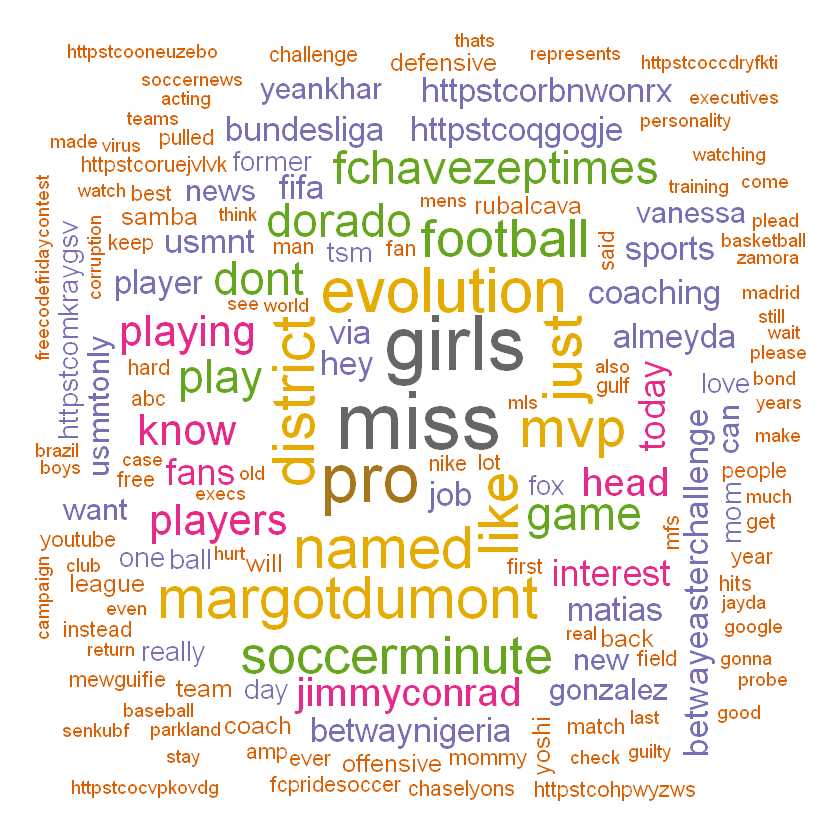

In [32]:
wordcloud(dm$word,dm$freq,random.order = FALSE, colors = brewer.pal(8,'Dark2'))